In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/rec/dataset/Price.csv")

In [3]:
#不要なデータの除去
data = data.drop('id', axis=1)
data = data.drop('date', axis=1)

In [4]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split
batch_size = 100
data_x = data.drop('price', axis=1)

In [6]:
data_y = data.price / data.price.max()
data_x = (data_x - data_x.mean()) / data_x.std()
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.4)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

In [7]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3218,0.676469,0.824816,0.304974,-0.178437,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.481095,1.533053,0.238136,-0.210124,-0.821228,1.227215,-0.064643,0.253063,-0.145562
18970,-0.398728,-0.473610,-0.370083,-0.231937,-0.915406,-0.087171,-0.305752,2.444237,-0.558823,-0.988286,1.081152,-0.612974,-0.210124,0.711339,0.122308,-1.285988,-0.359725,-0.202110
14756,-0.398728,-0.798217,-0.653172,-0.195724,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.952058,0.425896,0.306225,-0.210124,-1.026816,-1.973479,-1.094265,-0.753661,-0.210461
21180,-0.398728,0.500209,-0.468076,-0.297436,0.936484,-0.087171,-0.305752,-0.629172,0.291909,-0.167120,-0.658666,1.463734,-0.210124,-0.241843,-0.190905,2.669181,-0.330545,-0.365565
7607,-0.398728,0.500209,-0.424523,-0.333095,0.936484,-0.087171,-0.305752,-0.629172,0.291909,-0.782995,0.584061,1.123290,-0.210124,1.085135,-0.141830,-1.229182,-0.505627,-0.419257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371,0.676469,-0.473610,-0.609620,-0.178824,-0.915406,-0.087171,-0.305752,0.907533,-0.558823,-0.324108,-0.658666,-0.136352,-0.210124,-0.821228,1.266908,0.162584,-0.680710,-0.192954
5956,0.676469,0.500209,0.130765,-0.137854,0.936484,-0.087171,-0.305752,-0.629172,0.291909,0.497058,-0.658666,0.544535,-0.210124,-1.437992,-1.583766,-0.391282,0.471917,-0.131572
993,-0.398728,-0.149004,-0.642284,-0.180007,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.360336,-0.658666,0.578580,-0.210124,-1.400612,-1.724496,-0.788929,-0.578578,-0.182150
18270,-1.473925,-1.447430,-1.175797,-0.263830,-0.915406,-0.087171,-0.305752,2.444237,-2.260286,-0.952058,-0.658666,-1.940705,-0.210124,-1.419302,-1.898423,-0.093047,-1.424810,-0.235915


In [8]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5207,0.676469,-0.149004,0.272310,-0.176941,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,-0.674311,1.826788,-0.340619,-0.210124,0.879547,1.088651,-0.774728,-1.074645,-0.168782
4381,-0.398728,1.798635,0.827598,-0.256853,2.788374,-0.087171,-0.305752,-0.629172,1.993372,1.269920,-0.658666,1.191379,-0.210124,-0.484811,1.059783,0.688046,1.537002,-0.269865
7880,-1.473925,-1.447430,-1.404445,-0.189084,-0.915406,-0.087171,-0.305752,0.907533,-1.409554,-1.205653,-0.658666,-0.919374,-0.210124,-0.372672,-0.598660,0.283298,-1.658253,-0.196653
17471,1.751667,2.772455,2.003504,-0.089206,0.936484,-0.087171,-0.305752,-0.629172,-0.558823,2.574125,-0.658666,-0.544885,4.781421,-1.344543,0.119421,0.446618,-0.855792,-0.110549
7251,-0.398728,-0.798217,-0.674948,-0.192344,-0.915406,-0.087171,-0.305752,0.907533,-0.558823,-0.976210,0.425896,0.306225,-0.210124,-0.877297,-1.188280,0.162584,-0.855792,-0.153693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12759,-0.398728,-0.473610,-0.272091,-0.186767,-0.915406,-0.087171,-0.305752,-0.629172,-0.558823,0.050247,-0.658666,-0.476796,-0.210124,-1.307163,0.330877,0.659643,-0.563988,-0.185629
922,-0.398728,-0.798217,-0.805604,-0.160717,-0.915406,-0.087171,-0.305752,0.907533,-0.558823,-0.541475,-0.658666,-0.442752,-0.210124,2.057007,-0.862798,-0.469391,-0.943333,-0.140947
18004,1.751667,0.824816,0.359414,0.104780,0.936484,-0.087171,2.304132,-0.629172,1.993372,0.605742,-0.387525,-0.102308,-0.210124,-0.709089,-0.037185,0.020567,1.449460,0.244598
13579,1.751667,-0.473610,0.272310,-0.272980,0.010539,-0.087171,-0.305752,-0.629172,-0.558823,-0.517323,1.533053,-1.498128,-0.210124,0.692649,0.890908,-0.668215,0.165522,-0.328465


In [9]:
Y_train

3218     0.052597
18970    0.074935
14756    0.020779
21180    0.056258
7607     0.055844
           ...   
4371     0.064929
5956     0.037013
993      0.032857
18270    0.024662
2222     0.058831
Name: price, Length: 12967, dtype: float64

In [10]:
Y_test

5207     0.064935
4381     0.093188
7880     0.019481
17471    0.084481
7251     0.026494
           ...   
12759    0.070773
922      0.033117
18004    0.171640
13579    0.101299
1091     0.058182
Name: price, Length: 4323, dtype: float64

In [11]:
import numpy as np
x_train = torch.from_numpy(np.array(X_train)).float()
y_train = torch.from_numpy(np.array(Y_train)).float()
x_val = torch.from_numpy(np.array(X_val)).float()
y_val = torch.from_numpy(np.array(Y_val)).float()
x_test = torch.from_numpy(np.array(X_test)).float()
y_test = torch.from_numpy(np.array(Y_test)).float()


print(x_train.size(), x_val.size(), x_test.size())

torch.Size([12967, 18]) torch.Size([4323, 18]) torch.Size([4323, 18])


In [282]:
input_features = 18
layer1_neurons = 9
layer2_neurons = 6
layer3_neurons = 1

class DL(nn.Module):
  def __init__(self):
    super(DL, self).__init__()

    self.relu = nn.Softplus()
    self.sigmoid = nn.Sigmoid()
    self.tanh = nn.Tanh()

    self.layer1 = nn.Linear(input_features, layer1_neurons)
    self.layer2 = nn.Linear(layer1_neurons, layer2_neurons)
    self.out = nn.Linear(layer2_neurons, layer3_neurons)
  
  def forward(self, x):
    x = x.view(-1, 18)
    x = self.tanh(self.layer1(x))
    x = self.tanh(self.layer2(x))
    x = self.relu(self.out(x))
    return x

model = DL()
model
    

DL(
  (relu): Softplus(beta=1, threshold=20)
  (sigmoid): Sigmoid()
  (tanh): Tanh()
  (layer1): Linear(in_features=18, out_features=9, bias=True)
  (layer2): Linear(in_features=9, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=1, bias=True)
)

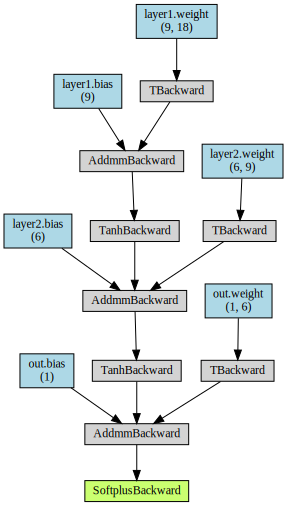

In [283]:
x = x_train[:5]
y = model(x)
!pip install torchviz
import torchviz
from torchviz import make_dot
make_dot(y, params=dict(model.named_parameters()))

In [284]:
import torch.optim as optim
lr = 0.01
weight_decay = 10**(-4)

optimizer = optim.SGD(
    model.parameters(),
    lr = lr,
    weight_decay = weight_decay
)

In [285]:
criterion = nn.MSELoss()

In [286]:
def train_step(x_train, y_train):
  model.train()

  pred_y = model(x_train)
  optimizer.zero_grad()
  loss = criterion(pred_y, y_train)
  loss.backward()
  optimizer.step()
  y = y_train.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  return loss.item(), y, pred_y

def val_step(x_val, y_val):
  model.eval()

  pred_y = model(x_val)
  loss = criterion(pred_y, y_val)
  y = y_val.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()

  return loss.item(), y, pred_y

In [287]:
def init_parameters(layer):
  if type(layer) == nn.Linear:
    nn.init.xavier_uniform_(layer.weight) #重みを一様ランダム値に初期化
    layer.bias.data.fill_#バイアスを０に初期化

model.apply(init_parameters)


EPOCHS = 70
train_history = []
val_history = []
R2_train_history = []
R2_val_history = []
for epoch in range(EPOCHS):
  total_loss_train = 0
  total_loss_val = 0
  R2_score_train = 1.0
  R2_score_val = 1.0
  y_index_train = []
  y_index_val = []
  r2_bumbo_train = 0
  r2_bunshi_train = 0
  y_mean_train = 0
  r2_bumbo_val = 0
  r2_bunshi_val = 0
  y_mean_val = 0

  for i in range(batch_size):
    n_val = np.random.randint(0, high=len(x_val))
    val_x, val_y = x_val[n_val], y_val[n_val]
    loss_val, y, pred_y = val_step(val_x, val_y)
    total_loss_val += loss_val
    y_mean_val += y/batch_size
    r2_bunshi_val += (y - pred_y)**2
    y_index_val.append(y)


  for i in range(batch_size):
    y = y_index_val[i]
    r2_bumbo_val += (y - y_mean_val)**2
    

  R2_score_val -= (r2_bunshi_val/r2_bumbo_val)
  R2_val_history.append(R2_score_val)

  for i in range(batch_size):
    n_train = np.random.randint(0, high=len(x_train))
    train_x, train_y = x_train[n_train], y_train[n_train]
    loss_train, y, pred_y = train_step(train_x, train_y)
    total_loss_train += loss_train
    y_mean_train += y/batch_size
    r2_bunshi_train += (y - pred_y)**2
    y_index_train.append(y)

  for i in range(batch_size):
    y = y_index_train[i]
    r2_bumbo_train += (y - y_mean_train)**2

  R2_score_train -= (r2_bunshi_train/r2_bumbo_train)
  R2_train_history.append(R2_score_train)

  
  if epoch >1:
    train_history.append(total_loss_train/batch_size)
    val_history.append(total_loss_val/batch_size)
  
  if epoch % 10 == 0:
    print("epoch: ",epoch)
    print("train_loss: ",total_loss_train/batch_size)
    print("val_loss: ",total_loss_val/batch_size)
    print("R2_train: ",R2_score_train)
    print("R2_val: ",R2_score_val)
    print('//////////////')

print(model.state_dict())
R2_train_history = np.reshape(R2_train_history, (EPOCHS, ))
R2_val_history = np.reshape(R2_val_history, (EPOCHS, ))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  0
train_loss:  0.34956642701057716
val_loss:  1.1916170288368448
R2_train:  [[-225.87718]]
R2_val:  [[-373.90082]]
//////////////
epoch:  10
train_loss:  0.004422295759397628
val_loss:  0.004795044079321897
R2_train:  [[-1.2846696]]
R2_val:  [[-0.81567526]]
//////////////
epoch:  20
train_loss:  0.003266953716815806
val_loss:  0.0028712160146926635
R2_train:  [[-0.05157733]]
R2_val:  [[-1.0045033]]
//////////////
epoch:  30
train_loss:  0.0020204493093474696
val_loss:  0.0008413395564905812
R2_train:  [[0.26927197]]
R2_val:  [[0.31435233]]
//////////////
epoch:  40
train_loss:  0.0014944882815444772
val_loss:  0.0024239297080515597
R2_train:  [[-0.14172804]]
R2_val:  [[0.26196283]]
//////////////
epoch:  50
train_loss:  0.0011006479071787468
val_loss:  0.0015278716068791987
R2_train:  [[0.11541134]]
R2_val:  [[-0.11246407]]
//////////////
epoch:  60
train_loss:  0.001521297186484105
val_loss:  0.0008772452746854142
R2_train:  [[0.3741657]]
R2_val:  [[0.60564065]]
//////////////

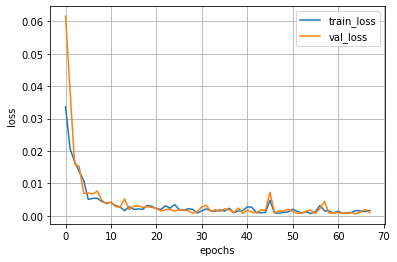

In [288]:
import matplotlib.pyplot as plt

plt.plot(train_history, marker=' ', label='train_loss')
plt.plot(val_history, marker=' ', label='val_loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

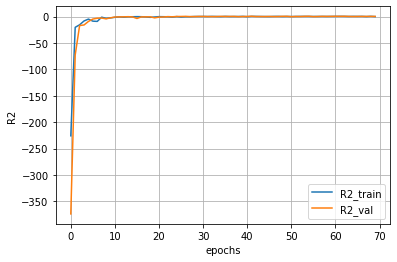

In [289]:
import matplotlib.pyplot as plt

plt.plot(R2_train_history, marker=' ', label='R2_train')
plt.plot(R2_val_history, marker=' ', label='R2_val')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

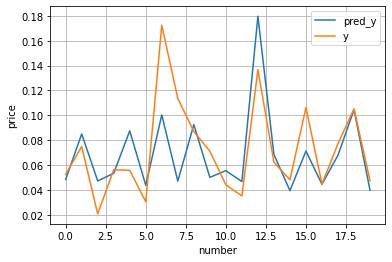

In [290]:
#訓練データに対するフィティングの評価
ys = []
pred_ys = []
for n in range(20):
  x = x_train[n]
  y = y_train[n]
  pred_y = model(x)
  pred_y = pred_y.view(1,)
  y = y.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  ys.append(y)
  pred_ys.append(pred_y)

plt.plot(pred_ys, marker=' ', label='pred_y')
plt.plot(ys, marker=' ', label='y')
plt.grid()
plt.xlabel('number')
plt.ylabel('price')
plt.legend()
plt.show()

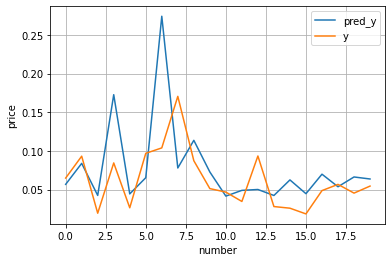

In [291]:
#テストデータに対するフィッティングの評価
ys = []
pred_ys = []
for n in range(20):
  x = x_test[n]
  y = y_test[n]
  pred_y = model(x)
  pred_y = pred_y.view(1,)
  y = y.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  ys.append(y)
  pred_ys.append(pred_y)

plt.plot(pred_ys, marker=' ', label='pred_y')
plt.plot(ys, marker=' ', label='y')
plt.grid()
plt.xlabel('number')
plt.ylabel('price')
plt.legend()
plt.show()

In [292]:
#誤差率の絶対値の評価
for i in range(20):
  n = np.random.randint(0, high=len(x_test))
  x = x_test[n]
  y = y_test[n]
  pred_y = model(x)
  pred_y = pred_y.view(1,)
  y = y.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  print("y : ", int(y*data.price.max()), ", pred_y : ", int(pred_y*data.price.max()), ", diff : ", int(100 * (abs(int(y*data.price.max()) - int(pred_y*data.price.max())))/ int(y*data.price.max())), "%")

y :  500000 , pred_y :  437337 , diff :  12 %
y :  342000 , pred_y :  315244 , diff :  7 %
y :  852600 , pred_y :  913686 , diff :  7 %
y :  210000 , pred_y :  315410 , diff :  50 %
y :  701999 , pred_y :  895508 , diff :  27 %
y :  1149999 , pred_y :  1082378 , diff :  5 %
y :  287000 , pred_y :  903003 , diff :  214 %
y :  329999 , pred_y :  535330 , diff :  62 %
y :  430999 , pred_y :  511327 , diff :  18 %
y :  434999 , pred_y :  449967 , diff :  3 %
y :  314999 , pred_y :  483889 , diff :  53 %
y :  687999 , pred_y :  832563 , diff :  21 %
y :  425000 , pred_y :  323747 , diff :  23 %
y :  818000 , pred_y :  608494 , diff :  25 %
y :  339999 , pred_y :  386701 , diff :  13 %
y :  432500 , pred_y :  423708 , diff :  2 %
y :  533000 , pred_y :  441053 , diff :  17 %
y :  572000 , pred_y :  347693 , diff :  39 %
y :  1080000 , pred_y :  1556801 , diff :  44 %
y :  584999 , pred_y :  317767 , diff :  45 %


In [293]:
#平均誤差率
#R2score
#平均二乗誤差
#平均二乗平方根誤差
error_rate = 0
R2_score = 1.0
y_mean = np.mean(y_test.detach().clone().numpy())
r2_bumbo = 0
r2_bunshi = 0
MAE = 0
RMSE = 0
for i in range(len(x_test)):
  x = x_test[i]
  y = y_test[i]
  pred_y = model(x)
  pred_y = pred_y.view(1,)
  y = y.detach().clone().numpy()
  pred_y = pred_y.detach().clone().numpy()
  error_rate_i = (100 * (abs(int(y*data.price.max()) - int(pred_y*data.price.max())))/ int(y*data.price.max()))
  MAE_i = (abs(int(y*data.price.max()) - int(pred_y*data.price.max())))
  RMSE_i = MAE_i ** 2
  error_rate += error_rate_i
  MAE += MAE_i
  RMSE += RMSE_i
  r2_bunshi_i = (y - pred_y)**2
  r2_bumbo_i = (y - y_mean)**2
  
  r2_bumbo += r2_bumbo_i
  r2_bunshi += r2_bunshi_i

MAE = MAE / len(x_test)
RMSE = (RMSE / len(x_test))**(0.5)
mean_error_rate = error_rate / len(x_test)
R2_score = 1 - (r2_bunshi/r2_bumbo)
R2_score = np.reshape(R2_score, (1, ))
print("mean_error_rate :",int(mean_error_rate), " %")
print("R2_score : ",R2_score)
print("MAE : ", MAE)
print("RMSE : ", RMSE)

mean_error_rate : 38  %
R2_score :  [0.38959193]
MAE :  182818.86768447838
RMSE :  294416.9506238335
